In [63]:
import numpy as np
from scipy.optimize import newton, bisect
import matplotlib.pyplot as plt

# Zadanie 1

In [64]:
# functions and their derivatives
def f1(x):
    return x**3 - 5*x

def f1prim(x):
    return 3*x**2 - 5

def f2(x):
    return x**3 - 3*x + 1

def f2prim(x):
    return 3*x**2 - 3

def f3(x):
    return 2 - x**5

def f3prim(x):
    return - 5*x**4

def f4(x):
    return x**4 - 4.29*x**2 - 5.29

def f4prim(x):
    return 4*x**4 - 8.58*x


# All throw runtime errors
try:
    print(f"f1 root: {newton(f1, 1, f1prim)}")
except RuntimeError:
    print("Newton's method failed for f1")

try:
    print(f"f2 root: {newton(f2, 1, f2prim)}")
except RuntimeError:
    print("Newton's method failed for f2")

try:
    print(f"f3 root: {newton(f3, 0.01, f3prim)}")
except RuntimeError:
    print("Newton's method failed for f3")

try:
    print(f"f4 root: {newton(f4, 0.8, f4prim)}")
except RuntimeError:
    print("Newton's method failed for f4")



Newton's method failed for f1
Newton's method failed for f2
Newton's method failed for f3
Newton's method failed for f4


In [65]:
# Calling newton function without giving it fprime
# uses secant method instead

print(f"f1 root: {bisect(f1, -1, 1)}")
print(f"f2 root: {bisect(f2, -1, 1)}")
print(f"f3 root: {bisect(f3, 0, 2)}")
print(f"f4 root: {bisect(f4, 0, 3)}")

f1 root: 0.0
f2 root: 0.3472963553340378
f3 root: 1.148698354996668
f4 root: 2.3000000000006366


# Zadanie 2

In [66]:
def f(x):
    return x**2 - 3*x + 2

def phi1(x):
    return (x**2 + 2)/3

def phi2(x):
    return np.sqrt(3*x-2)

def phi3(x):
    return 3 - 2/x

def phi4(x):
    return (x**2 - 2)/(2*x-3)

In [67]:
# Returns every step of the iteration
def iterate(f, start, n):
    result = np.empty(n+1, dtype=np.double)
    result[0] = start
    x = start
    for i in range(1, n+1):
        x = f(x)
        result[i] = x

    return result


ITERATIONS = 10

# starting point
x0 = 2.5

it1 = iterate(phi1, x0, ITERATIONS)
print(f"Wyniki schematu iteracyjnego funkcji ϕ1: {it1}\n")

it2 = iterate(phi2, x0, ITERATIONS)
print(f"Wyniki schematu iteracyjnego funkcji ϕ2: {it2}\n")

it3 = iterate(phi3, x0, ITERATIONS)
print(f"Wyniki schematu iteracyjnego funkcji ϕ3: {it3}\n")

it4 = iterate(phi4, x0, ITERATIONS)
print(f"Wyniki schematu iteracyjnego funkcji ϕ4: {it4}\n")

Wyniki schematu iteracyjnego funkcji ϕ1: [2.50000000e+00 2.75000000e+00 3.18750000e+00 4.05338542e+00
 6.14331111e+00 1.32467571e+01 5.91588582e+01 1.16725684e+03
 4.54163507e+05 6.87548304e+10 1.57574223e+21]

Wyniki schematu iteracyjnego funkcji ϕ2: [2.5        2.34520788 2.24401953 2.17532953 2.1274371  2.09339707
 2.0688623  2.05099656 2.03788854 2.02821735 2.02105221]

Wyniki schematu iteracyjnego funkcji ϕ3: [2.5        2.2        2.09090909 2.04347826 2.0212766  2.01052632
 2.0052356  2.00261097 2.00130378 2.00065147 2.00032563]

Wyniki schematu iteracyjnego funkcji ϕ4: [2.5        2.125      2.0125     2.00015244 2.00000002 2.
 2.         2.         2.         2.         2.        ]



In [68]:
def convergance_order(data, root):
    result = np.empty(len(data) - 2)
    for i in range(1, len(data) - 1):
        result[i-1] = np.log(abs(data[i] - root) / abs(data[i+1] - root)) / np.log(abs(data[i-1] - root) / abs(data[i] - root))
    
    return result


order1 = convergance_order(it1, 2)
print(f"Convergance order for ϕ1: {order1}")

order2 = convergance_order(it2, 2)
print(f"Convergance order for ϕ2: {order2}")

order3 = convergance_order(it3, 2)
print(f"Convergance order for ϕ3: {order3}")

order4 = convergance_order(it4, 2)
print(f"Convergance order for ϕ4: {order4}")

Convergance order for ϕ1: [1.13334618 1.19173247 1.2818748  1.42247421 1.62805893 1.85443887
 1.97870102 1.99942703 1.99999926]
Convergance order for ϕ2: [0.93639611 0.95296164 0.96510196 0.97404295 0.98065478 0.98556031
 0.98920928 0.99192896 0.99395911]
Convergance order for ϕ3: [0.8604882  0.9354963  0.96889155 0.98471413 0.99242215 0.99622711
 0.99811753 0.99905976 0.99953013]
Convergance order for ϕ4: [1.66096405 1.91381385 1.99446577 1.94327727        inf        nan
        nan        nan        nan]


C:\Users\tomob\AppData\Local\Temp\ipykernel_12132\539838426.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  result[i-1] = np.log(abs(data[i] - root) / abs(data[i+1] - root)) / np.log(abs(data[i-1] - root) / abs(data[i] - root))
C:\Users\tomob\AppData\Local\Temp\ipykernel_12132\539838426.py:4: RuntimeWarning: invalid value encountered in scalar divide
  result[i-1] = np.log(abs(data[i] - root) / abs(data[i+1] - root)) / np.log(abs(data[i-1] - root) / abs(data[i] - root))


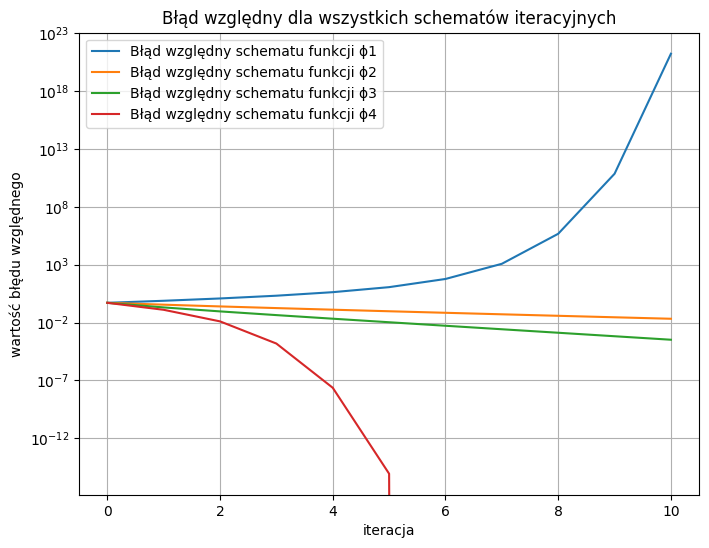

In [84]:
xs = [i for i in range(0, 11)]


plt.figure(figsize=(8, 6))
plt.plot(xs, abs(it1 - 2), label="Błąd względny schematu funkcji ϕ1")
plt.plot(xs, abs(it2 - 2), label="Błąd względny schematu funkcji ϕ2")
plt.plot(xs, abs(it3 - 2), label="Błąd względny schematu funkcji ϕ3")
plt.plot(xs, abs(it4 - 2), label="Błąd względny schematu funkcji ϕ4")
plt.yscale("log")
plt.xlabel("iteracja")
plt.ylabel("wartość błędu względnego")
plt.legend()
plt.grid()
plt.title("Błąd względny dla wszystkich schematów iteracyjnych")
plt.show()

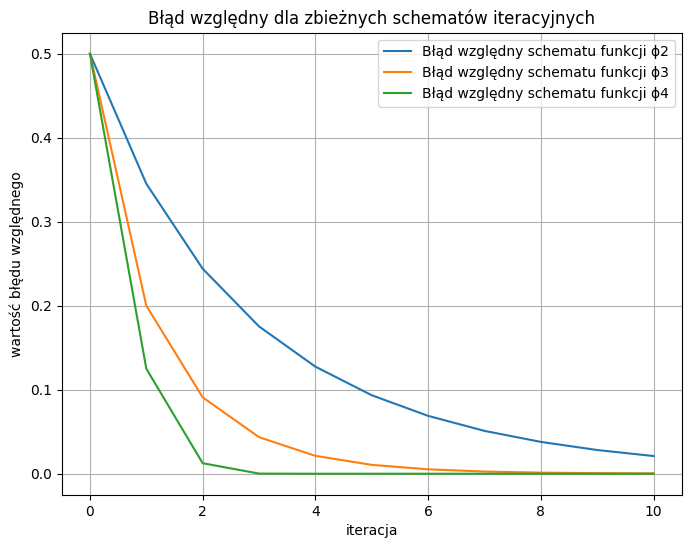

In [85]:
plt.figure(figsize=(8, 6))
plt.plot(xs, abs(it2 - 2), label="Błąd względny schematu funkcji ϕ2")
plt.plot(xs, abs(it3 - 2), label="Błąd względny schematu funkcji ϕ3")
plt.plot(xs, abs(it4 - 2), label="Błąd względny schematu funkcji ϕ4")
plt.legend()
plt.grid()
plt.xlabel("iteracja")
plt.ylabel("wartość błędu względnego")
plt.title("Błąd względny dla zbieżnych schematów iteracyjnych")
plt.show()

# Zadanie 3

In [71]:
def g1(x):
    return x ** 3 - 2 * x - 5

def g2(x):
    return np.exp(-x) - x

def g3(x):
    return x * np.sin(x) - 1

def g1prim(x):
    return 3 * x ** 2 - 2

def g2prim(x):
    return -np.exp(-x) - 1

def g3prim(x):
    return np.sin(x) + x * np.cos(x)

In [72]:
MANTISSA_START = 12

import struct

def double_to_bin(num) -> str:
    return ''.join('{:0>8b}'.format(c) for c in struct.pack('!d', num))

def bin_to_double(num: str):
    byte_values = [int(num[i:i+8], 2) for i in range(0, len(num), 8)]
    byte_data = bytes(byte_values)

    return struct.unpack("!d", byte_data)[0]

# how many bits match
def compare_binary(a: str, b: str):
    for i in range(len(a)):
        if a[i] != b[i]:
            return i + 1
    return len(a) + 1


exact_sol_g1 = newton(g1, 2.09, g1prim)
exact_sol_g2 = newton(g2, 0.56, g2prim)
exact_sol_g3 = newton(g3, 1.11, g3prim)

print(f"Dokładny pierwiastek g1: {exact_sol_g1}")
print(f"Dokładny pierwiastek g2: {exact_sol_g2}")
print(f"Dokładny pierwiastek g3: {exact_sol_g3}")



est_sol_g1 = bin_to_double(double_to_bin(exact_sol_g1)[:MANTISSA_START + 4] + ''.join(['0' for _ in range(MANTISSA_START + 4, 64)]))
est_sol_g2 = bin_to_double(double_to_bin(exact_sol_g2)[:MANTISSA_START + 4] + ''.join(['0' for _ in range(MANTISSA_START + 4, 64)]))
est_sol_g3 = bin_to_double(double_to_bin(exact_sol_g3)[:MANTISSA_START + 4] + ''.join(['0' for _ in range(MANTISSA_START + 4, 64)]))

print(f"Pierwiastek g1 z dokładnością 4 bitów w mantysie: {est_sol_g1}")
print(f"Pierwiastek g2 z dokładnością 4 bitów w mantysie: {est_sol_g2}")
print(f"Pierwiastek g3 z dokładnością 4 bitów w mantysie: {est_sol_g3}")

Dokładny pierwiastek g1: 2.0945514815423265
Dokładny pierwiastek g2: 0.5671432904097838
Dokładny pierwiastek g3: 1.11415714087193
Pierwiastek g1 z dokładnością 4 bitów w mantysie: 2.0
Pierwiastek g2 z dokładnością 4 bitów w mantysie: 0.5625
Pierwiastek g3 z dokładnością 4 bitów w mantysie: 1.0625


In [78]:
def newton_iters(start, f, fprim, exact_sol, acc, max_iters = 100):
    """
    Calculate how many iterations are needed to achieve requested accuracy.
    Args:
        start: starting poing
        f: function
        fprim: derivative
        exact_sol: solution we assume to be exact
        acc: accuracy (index of the first bit where our calculated solution doesn't match exact solution)
        max_iters: maximum number of iterations
    Returns:
        number of iterations needed to achieve given accuracy or max_iters
    """
    n = 0
    matching_bits = 0
    current = start
    while n < max_iters and matching_bits <= acc:
        prev = current
        current = prev - f(prev) / fprim(prev)  # Newton's iteration scheme
        matching_bits = compare_binary(double_to_bin(exact_sol), double_to_bin(current))
        n += 1

    return n


# Assuming accuracy in the task refers only to mantissa
print("Iteracje dla f1, dokładność 24 bitowa:", newton_iters(est_sol_g1, g1, g1prim, exact_sol_g1, 12+24))
print("Iteracje dla f2, dokładność 24 bitowa:", newton_iters(est_sol_g2, g2, g2prim, exact_sol_g2, 12+24))
print("Iteracje dla f3, dokładność 24 bitowa:", newton_iters(est_sol_g3, g3, g3prim, exact_sol_g3, 12+24))
print()
print("Iteracje dla f1, dokładność 52 bitowa:", newton_iters(est_sol_g1, g1, g1prim, exact_sol_g1, 12+52))
print("Iteracje dla f2, dokładność 52 bitowa:", newton_iters(est_sol_g2, g2, g2prim, exact_sol_g2, 12+52))
print("Iteracje dla f3, dokładność 52 bitowa:", newton_iters(est_sol_g3, g3, g3prim, exact_sol_g3, 12+52))

Iteracje dla f1, dokładność 24 bitowa: 3
Iteracje dla f2, dokładność 24 bitowa: 2
Iteracje dla f3, dokładność 24 bitowa: 2

Iteracje dla f1, dokładność 52 bitowa: 4
Iteracje dla f2, dokładność 52 bitowa: 3
Iteracje dla f3, dokładność 52 bitowa: 3


# Zadanie 4

In [80]:
sol_x1_1 = np.sqrt((np.sqrt(5) - 1) / 2)
sol_x1_2 = -sol_x1_1
sol_x2 = (np.sqrt(5) - 1) / 2

$ F(x_1, x_2) = (x_1^2 + x_2^2 - 1, x_1^2 - x_2) $

In [81]:
def F(x):
    x1, x2 = x
    return np.array([x1**2 + x2**2 - 1, x1**2 - x2])

def Fprim(x):
    x1, x2 = x
    return np.array([[2*x1, 2*x2], 
                     [2*x1, -1]])

$ x_{k+1} = x_k - (F'(x_k))^{-1} F(x_k) $

In [ ]:
def newton_scheme_2_variables(start, f, fprim, iter):
    current = start

    for _ in range(iter):
        prev = current

        current = prev - np.dot(np.linalg.inv(fprim(prev)), f(prev))

    return current

res = newton_scheme_2_variables([1., 0.], F, Fprim, 5)

print(f"x1 = {res[0]}\tBłąd = {abs(res[0] - sol_x1_1)}\tBłąd względny = {abs((res[0] - sol_x1_1)/sol_x1_1)}")
print(f"x2 = {res[1]}\tBłąd = {abs(res[1] - sol_x2)}\tBłąd względny = {abs((res[1] - sol_x2)/sol_x2)}")


# ostatnie poprawić na liczenie bez odwracania macierzy

# liczba, nie ilość

# dopisać spodziewaną liczbę iteracji w zadaniu 3 (taką na logikę)

# w pierwszym dokładniej opisać co jest nie spełnione

# zmienić 2 wykres na skalę logarytmiczną

# w pierszym może jakiś wykres, żeby było widać skąd te miejsca zerowe

x1 = 0.7861513777620804	Błąd = 4.657163543697607e-12	Błąd względny = 5.924003538583929e-12
x2 = 0.618033988749989	Błąd = 9.414691248821327e-14	Błąd względny = 1.52332904341791e-13
